**The Movie Database's (TMDb) API is a great source of all things movie related.** <p>
QUESTIONS:<p>
    1. What is the mean, median, and mode BUDGET for films?
    2. What is the mean, median, and mode REVENUE for films?
    2. What is the mean, median, and mode RUNTIME for films?
    4. What independent variable is the most closely correlated to revenue?
    5. What films have outsized returns -- the highest revenue:budget ratio?

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [77]:
alt = 'https://raw.githubusercontent.com/premonish/Springboard/master/Data/tmdb_5000_movies.csv'
movies = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [3]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [61]:
#credits.cast.value_counts()

1

In [72]:
print('Mean budget:', str(round(movies.budget.mean(),2)))
print('Median budget:', str(movies.budget.median()))
print('Budget Mode:', str(movies.budget.mode()[0]))

Mean budget: 29045039.88
Median budget: 15000000.0
Budget Mode: 0


In [100]:
print('Mean budget:', str(round(movies.revenue.mean(),2)))
print('Median budget:', str(movies.revenue.median()))
print('Budget Mode:', str(movies.revenue.mode()[0]))

Mean budget: 82260638.65
Median budget: 19170001.0
Budget Mode: 0


In [74]:
print('Mean budget:', str(round(movies.runtime.mean(),2)))
print('Median budget:', str(movies.runtime.median()))
print('Budget Mode:', str(movies.runtime.mode()[0]))

Mean budget: 106.88
Median budget: 103.0
Budget Mode: 90.0


In [53]:
new = movies.genres.value_counts()
new.head()

[{"id": 18, "name": "Drama"}]                                       370
[{"id": 35, "name": "Comedy"}]                                      282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]     164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]    144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]         142
Name: genres, dtype: int64

In [52]:
#movies.keywords.value_counts()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
co2 = np.corrcoef((movies.budget, movies.revenue))[0][1]

Text(0.5, 1.0, "Pearson's CorrCoef: 0.7308228569244616")

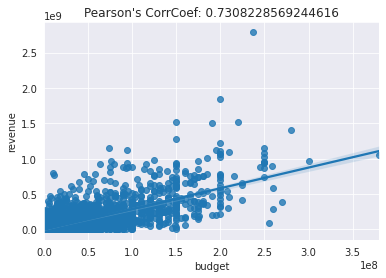

In [10]:
sns.set_style("darkgrid")
sns.regplot(x='budget', y='revenue', data=movies)
plt.title('Pearson\'s CorrCoef: '+str(co2))

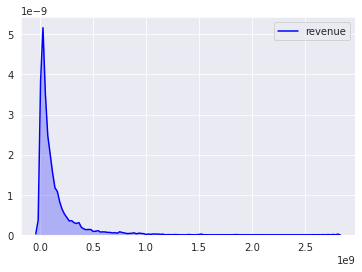

In [49]:
ax = sns.kdeplot(movies.revenue, shade=True, color="b")

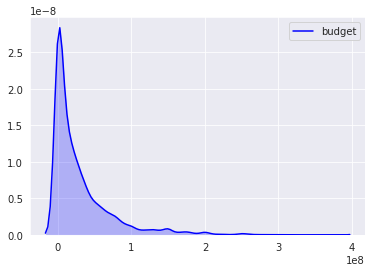

In [51]:
ax = sns.kdeplot(movies.budget, shade=True, color="b")

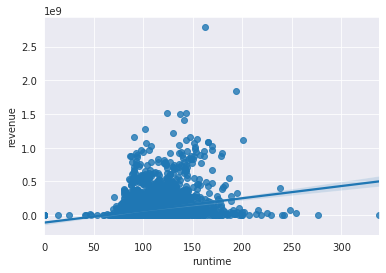

In [11]:
sns.regplot(x='runtime', y='revenue', data=movies)

0.6447235045559979


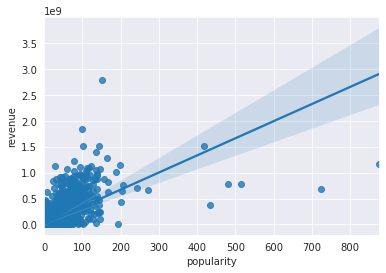

In [12]:
co3 = np.corrcoef((movies.popularity, movies.revenue))[0][1]
sns.regplot(x='popularity', y='revenue', data=movies)
print(co3)

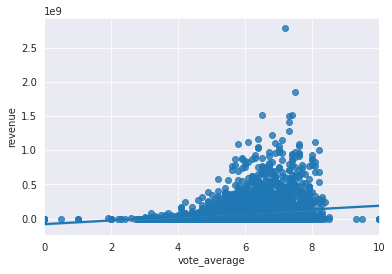

In [13]:
sns.regplot(x='vote_average', y='revenue', data=movies)

In [179]:
# create a feature 'pct' ||| revenue : budget ratio (higher is better)
movies['pct'] = movies.revenue/movies.budget
movies.pct = movies.pct.replace(np.inf, '0')
pct.fillna(0)
movies['pct'].head()
#print(movies['pct'].mean(axis = 1), skipna = True)
movies.pct = movies.pct.astype(float)
h = movies.sort_values(by=['pct'], ascending=False)
h2 = h[['original_title', 'pct']]

In [165]:
h.original_title.head(100)

4238                     Modern Times
3137                        Nurse 3-D
4577              Paranormal Activity
4582                        Tarnation
4496          The Blair Witch Project
                    ...              
3825                        Airplane!
4669    The Beast from 20,000 Fathoms
2514                          Top Gun
2516                  American Beauty
3338                       Flashdance
Name: original_title, Length: 100, dtype: object

In [228]:
h2.head(20)

,original_title,pct
4238,Modern Times,8.500000e+06
3137,Nurse 3-D,1.000000e+06
4577,Paranormal Activity,1.289039e+04
4582,Tarnation,5.330339e+03
4496,The Blair Witch Project,4.133333e+03
4724,Eraserhead,7.000000e+02
4788,Pink Flamingos,5.000000e+02
4742,Super Size Me,4.396166e+02
4723,The Gallows,4.266441e+02
4514,Open Water,4.205227e+02


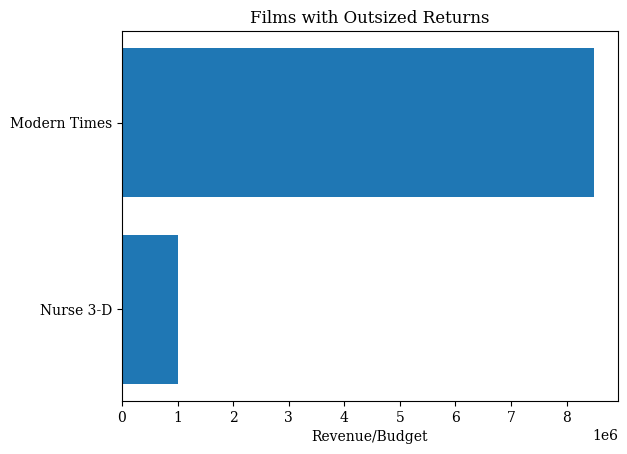

In [255]:
fig, ax = plt.subplots()

plt.rcParams['font.family'] = "serif"
ax.barh(h2.original_title[:2], h2.pct[:2], align='center')
ax.set_yticks(h2.original_title[:2])
ax.set_yticklabels(h2.original_title[:2])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue/Budget')
ax.set_title('Films with Outsized Returns')

plt.show()

These outliers "Modern Times" and "Nurse 3-D" are due to inaccurate data according to my research. 

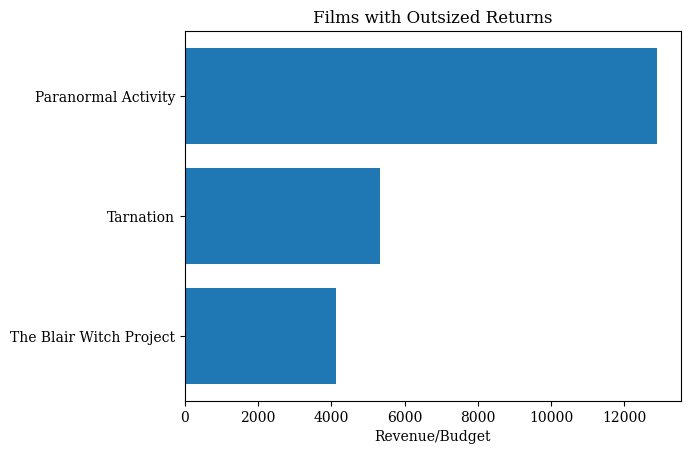

In [254]:
fig, ax = plt.subplots()

plt.rcParams['font.family'] = "serif"
ax.barh(h2.original_title[2:5], h2.pct[2:5], align='center')
ax.set_yticks(h2.original_title[2:5])
ax.set_yticklabels(h2.original_title[2:5])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue/Budget')
ax.set_title('Films with Outsized Returns')

plt.show()

# [Paranormal Activity](http://https://en.wikipedia.org/wiki/Paranormal_Activity#:~:text=It%20was%20given%20a%20limited,the%20U.S.%20rights%20for%20%24350%2C000.) was apparently made for 15,000(USD) and grossed a whooping **193 million!**



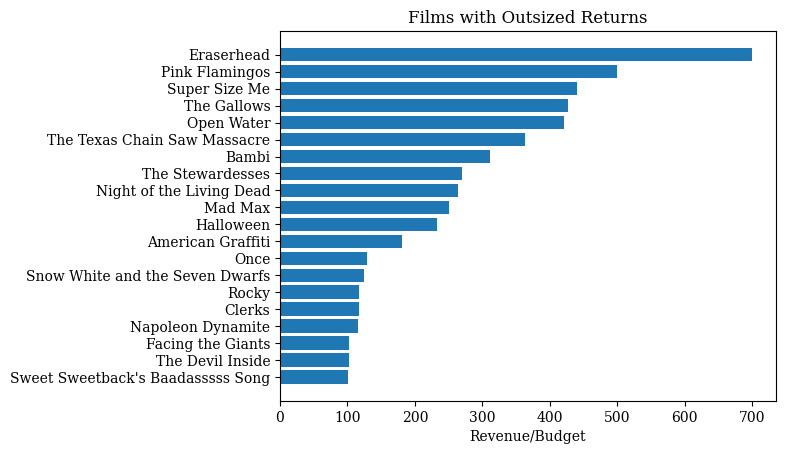

In [256]:
fig, ax = plt.subplots()

plt.rcParams['font.family'] = "serif"
ax.barh(h2.original_title[5:25], h2.pct[5:25], align='center')
ax.set_yticks(h2.original_title[5:25])
#ax.set_xlabels(h2.pct[5:25])
ax.set_yticklabels(h2.original_title[5:25])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue/Budget')
ax.set_title('Films with Outsized Returns')

plt.show()

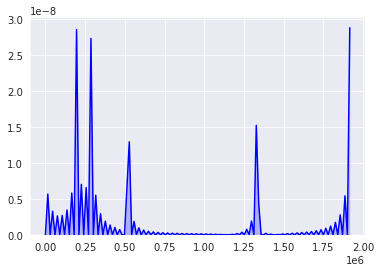

In [50]:
ax = sns.kdeplot(movies.pct, shade=True, color="b")

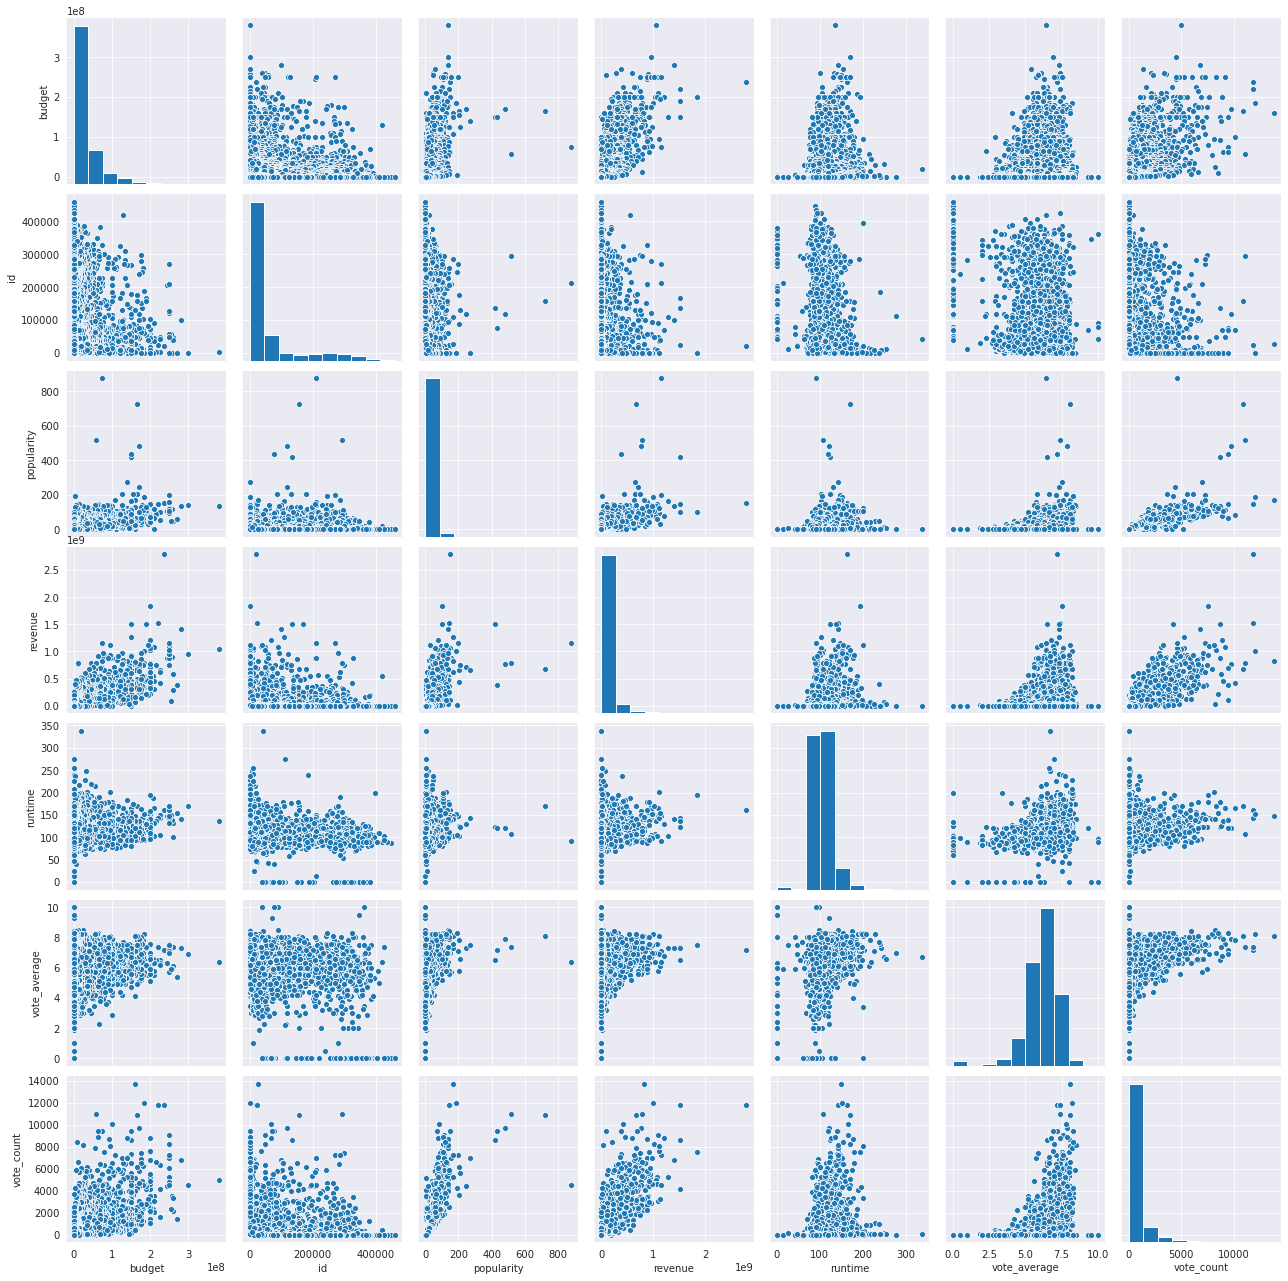

In [14]:
sns.pairplot(movies)

In [90]:
co4 = np.corrcoef((movies.vote_count, movies.revenue))[0][1]
co4

0.781487326210197

> **There is a positive correlation between **movie budget** and **movie revenue** (Pearson's CorrCoef: 0.7308).
> 
> **There is a stronger positive correlation between **vote count** and **movie revenue** (Pearson's CorrCoef: 0.7815).****

Is there are a 'sweet spot' or a clear point of diminishing returns?

In [80]:
movies2 = movies[['budget','popularity','revenue','runtime','vote_average','vote_count']]

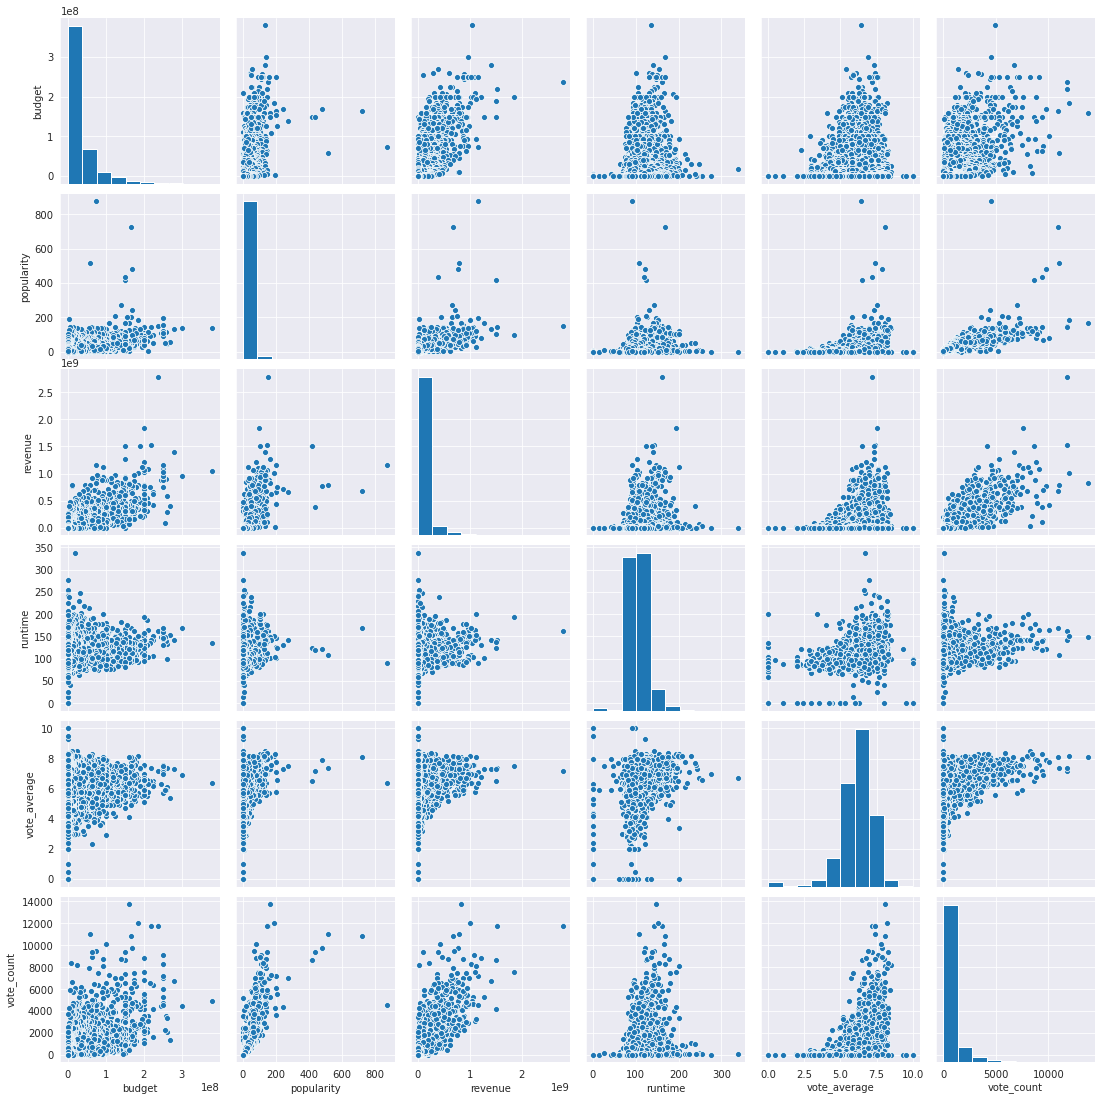

In [99]:
ax = sns.pairplot(movies2)